In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from statistics import mean 

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
# Importing the required packages 

In [3]:
df1 = pd.read_csv('training_dataset.csv')
df2 = pd.read_csv('validation_dataset.csv')
df3 = pd.read_csv('test_dataset.csv')

In [4]:
frames = [df1, df2, df3] 
finaldataset = pd.concat(frames)
finaldataset1 = finaldataset.copy()

In [5]:
from sklearn import preprocessing
finaldataset['FIRE_DISCOVERY_MONTH'] = pd.DatetimeIndex(finaldataset['DISCOVERY_DATE']).month
finaldataset['DAY_OF_WEEK'] = pd.to_datetime(finaldataset['DISCOVERY_DATE']).dt.day_name()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
enc=LabelEncoder()

In [8]:
finaldataset['DAY_OF_WEEK'] = enc.fit_transform(finaldataset['DAY_OF_WEEK'])
finaldataset['FIRE_DISCOVERY_MONTH'] = enc.fit_transform(finaldataset['FIRE_DISCOVERY_MONTH'])
finaldataset['STATE'] = enc.fit_transform(finaldataset['STATE'])
finaldataset['FIRE_SIZE_CLASS'] = enc.fit_transform(finaldataset['FIRE_SIZE_CLASS'])
finaldataset['NWCG_REPORTING_AGENCY'] = enc.fit_transform(finaldataset['NWCG_REPORTING_AGENCY'])
finaldataset['SOURCE_REPORTING_UNIT_NAME'] = enc.fit_transform(finaldataset['SOURCE_REPORTING_UNIT_NAME'])
finaldataset['FIRE_YEAR'] = enc.fit_transform(finaldataset['FIRE_YEAR'])

In [9]:
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Miscellaneous", 'STAT_CAUSE_DESCR'] = "Miscellaneous/Missing/Undefined"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Missing/Undefined", 'STAT_CAUSE_DESCR'] = "Miscellaneous/Missing/Undefined"

In [10]:
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Campfire" , 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning/Arson"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Fireworks", 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning/Arson"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Smoking", 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning/Arson"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Debris Burning", 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning/Arson"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Arson", 'STAT_CAUSE_DESCR'] = "Campfire/Fireworks/Smoking/DebrisBurning/Arson"

In [11]:
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Powerline" , 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Railroad", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Structure", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Equipment Use", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"
finaldataset.loc[finaldataset['STAT_CAUSE_DESCR'] == "Children", 'STAT_CAUSE_DESCR'] = "Powerline/Railroad/Children/Structure/EquipmentUse"

In [12]:
finaldataset['STAT_CAUSE_DESCR'].unique()

array(['Lightning', 'Campfire/Fireworks/Smoking/DebrisBurning/Arson',
       'Powerline/Railroad/Children/Structure/EquipmentUse',
       'Miscellaneous/Missing/Undefined'], dtype=object)

In [13]:
X = finaldataset[['FIRE_YEAR','FIRE_DISCOVERY_MONTH','NWCG_REPORTING_AGENCY',
                           'STATE', "FIRE_SIZE_CLASS"]] # Features
y = finaldataset[["STAT_CAUSE_DESCR"]] # Target variable

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,accuracy_score  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=10)

In [15]:
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train, y_train.values.ravel())
        
y_pred = clf_rf.predict(X_test)
print(f1_score(y_test, y_pred, average="micro"))

0.658885151752835


Text(0.5, 1.0, 'Average score: 0.6630187058608213')

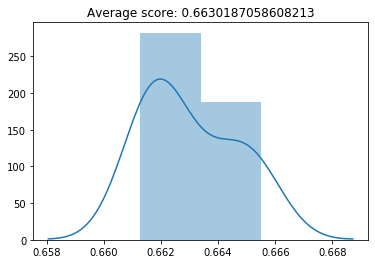

In [16]:
from sklearn.model_selection import cross_val_score
clf_rf = RandomForestClassifier(random_state=10)
cv_scores = cross_val_score(clf_rf, X, y.values.ravel(), cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [17]:
rfc = RandomForestClassifier(random_state=10)
params = {'bootstrap': ['True', 'False'], 'max_depth': [22,25,30,35], 'n_estimators': [10, 50, 100, 200, 500], 'max_features': [1,2,3,4,5]}
clf = RandomizedSearchCV(rfc, params, n_jobs=-1, verbose = 1)
clf.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 207.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 210.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [18]:

print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'n_estimators': 50, 'max_features': 3, 'max_depth': 22, 'bootstrap': 'True'}
0.6596782770539751
RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=22, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


## Bagging Classifier

In [19]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=5, warm_start=True,random_state=3141)

clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)

In [20]:
print("Accuracy score for Bagging classifier is:",accuracy_score(y_test,y_pred))

Accuracy score for Bagging classifier is: 0.6544714906741469


## XGBoost

In [21]:
import xgboost as xgb
boost = xgb.XGBClassifier(max_depth=9,
                          subsample=0.9,
                          objective='multi:softmax',
                          num_class = 3,
                          min_child_weight=2,
                          colsample_bytree=0.7,
                          n_estimators=1000,
                          learning_rate=0.08,
                          n_jobs = -1)
boost.fit(X_train,y_train.values.ravel())
boost_pred = boost.predict(X_test)

In [22]:
print("Accuracy score for XGBoost:",accuracy_score(y_test,boost_pred))

Accuracy score for XGBoost: 0.6765663843873386


Text(0.5, 1.0, 'Average score: 0.6778046279476457')

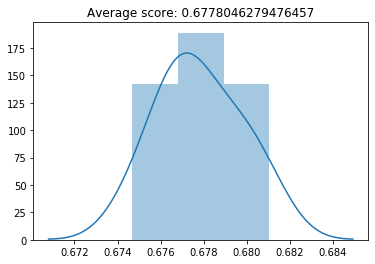

In [23]:
from sklearn.model_selection import cross_val_score
clf_rf = xgb.XGBClassifier(max_depth=9,
                          subsample=0.9,
                          objective='multi:softmax',
                          num_class = 3,
                          min_child_weight=2,
                           
                          colsample_bytree=0.7,
                          n_estimators=1000,
                          learning_rate=0.08,
                          n_jobs = -1)
cv_scores = cross_val_score(clf_rf, X, y.values.ravel(), cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

###### Some more experiment

In [24]:
X = finaldataset[['FIRE_YEAR','FIRE_DISCOVERY_MONTH',"STAT_CAUSE_CODE",
                           'STATE']] # Features
y = finaldataset[["FIRE_SIZE_CLASS"]] # Target variable

In [25]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

finaldataset['STAT_CAUSE_DESCR'] = finaldataset['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original df earlier in the kernel

In [26]:
X = finaldataset[['FIRE_YEAR','FIRE_DISCOVERY_MONTH',"FIRE_SIZE_CLASS", 'NWCG_REPORTING_AGENCY',
                           'DAY_OF_WEEK',
                           'STATE']] # Features
y = finaldataset[['STAT_CAUSE_DESCR']] # Target variable

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=10)

Text(0.5, 1.0, 'Average score: 0.9122097542970053')

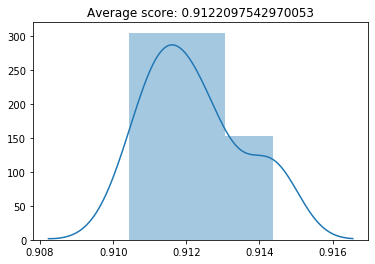

In [28]:
from sklearn.model_selection import cross_val_score
clf_rf = RandomForestClassifier(random_state=10)
cv_scores = cross_val_score(clf_rf, X, y.values.ravel(), cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train.values.ravel())
y_pred = model.predict(X_test)

In [30]:
print("Accuracy score for Naive Bayes is:",accuracy_score(y_test,y_pred))

Accuracy score for Naive Bayes is: 0.8460403344810624


#### Bagging Classifier:


In [31]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=5, warm_start=True,random_state=3141)

clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)

In [32]:
print("Accuracy score for Bagging classifier is:",accuracy_score(y_test,y_pred))

Accuracy score for Bagging classifier is: 0.9077651187833184


#### XGBoost

In [33]:
import xgboost as xgb
boost = xgb.XGBClassifier(max_depth=9,
                          subsample=0.9,
                          objective='multi:softmax',
                          num_class = 3,
                          min_child_weight=2,
                          colsample_bytree=0.7,
                          n_estimators=1000,
                          learning_rate=0.08,
                          n_jobs = -1)
boost.fit(X_train,y_train.values.ravel())
boost_pred = boost.predict(X_test)

In [34]:
print("Accuracy score for XGBoost:",accuracy_score(y_test,boost_pred))

Accuracy score for XGBoost: 0.9211656319378897


#### Decision Tree

In [35]:
tree_model = tree.DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [36]:
print("Accuracy score for Decision Tree:",accuracy_score(y_test,y_pred))

Accuracy score for Decision Tree: 0.9022613365948339


Text(0.5, 1.0, 'Average score: 0.9020077114857987')

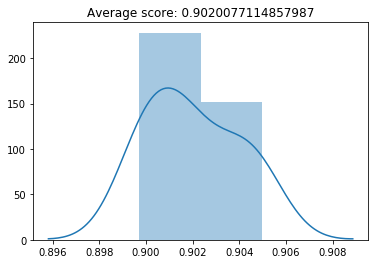

In [37]:
dtc = tree.DecisionTreeClassifier(random_state=10)
cv_scores = cross_val_score(dtc, X, y, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

#### KNN Classifier:


In [38]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train.values.ravel())
knn_prediction = knn_model.predict(X_test)

In [39]:
print("Accuracy score for Decision Tree:",accuracy_score(y_test,knn_prediction))

Accuracy score for Decision Tree: 0.9095066537270177
